# Clustering de documents

## Imports

In [15]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_distances


In [3]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/ilaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
# chargement du corpus 
data_path = "../../data/txt_tp4/"

# tous les fichiers .txt
files = sorted([f for f in os.listdir(data_path) if f.endswith(".txt")])

# on charge les textes
texts = [open(os.path.join(data_path, f), "r", encoding="utf-8").read()
         for f in files]

print("Nombre de documents chargés :", len(texts))


Nombre de documents chargés : 999


In [7]:
# Filtrer les articles contenant “sorcière” + (femm ou fémin)**
import re

def matches_query(text):
    text_lower = text.lower()
    cond1 = "sorcière" in text_lower or "sorciere" in text_lower
    cond2 = bool(re.search(r"\bfemm\w*|\bfémin\w*", text_lower))
    return cond1 and cond2

filtered_files = []
filtered_texts = []

for f, t in zip(files, texts):
    if matches_query(t):
        filtered_files.append(f)
        filtered_texts.append(t)

print("Articles correspondant à la requête :", len(filtered_texts))


Articles correspondant à la requête : 993


In [18]:
# pretraitement et tokenizer
def preprocessing(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text.lower())
    return tokens
resultat = preprocessing(filtered_texts[0])[:50]
print(resultat)

['samedi', '20', 'janvier', '1951', 'le', 'som', 'conseil', 'de', 'guerre', 'de', 'bruxelles', 'le', 'procès', 'von', 'falkenhausen', 'audience', 'de', 'vendredi', 'm®', 'rolin', 'poursuivant', 'sa', 'réplique', 'traite', 'la', 'question', 'juive', 'il', 'souligne', 'les', 'dizaines', 'd', '’', 'ordonnances', 'signées', 'par', 'les', 'accusés', 'pour', 'réduire', 'ainsi', 'qu', '’', 'ils', 'l', '’', 'ont', 'écrit', 'les', 'possibilités']


## TF-IDF sur les textes filtrés

In [9]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words("french"),
    max_df=0.6,
    min_df=2,          # au moins 2 documents
    lowercase=True
)

tfidf_vectors = vectorizer.fit_transform(filtered_texts)

print("Shape TF-IDF :", tfidf_vectors.shape)


/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape TF-IDF : (993, 102533)


### Clustering KMeans

In [10]:
N_CLUSTERS = 4

km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)


### Regrouper les fichiers par cluster

In [11]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(filtered_files[idx])

pprint(dict(clustering))


{np.int32(0): ['KB_JB838_1951-01-20_01-00005.txt',
               'KB_JB838_1951-02-04_01-00020.txt',
               'KB_JB838_1951-02-24_01-00018.txt',
               'KB_JB838_1951-04-06_01-00007.txt',
               'KB_JB838_1951-05-11_01-00002.txt',
               'KB_JB838_1951-06-09_01-00001.txt',
               'KB_JB838_1951-06-21_01-00002.txt',
               'KB_JB838_1951-06-21_01-00007.txt',
               'KB_JB838_1951-08-10_01-00014.txt',
               'KB_JB838_1951-09-08_01-00010.txt',
               'KB_JB838_1951-11-23_01-00002.txt',
               'KB_JB838_1952-03-16_01-00005.txt',
               'KB_JB838_1952-03-22_01-00006.txt',
               'KB_JB838_1952-03-22_01-00016.txt',
               'KB_JB838_1952-04-08_01-00008.txt',
               'KB_JB838_1952-06-03_01-00001.txt',
               'KB_JB838_1952-07-23_01-00006.txt',
               'KB_JB838_1952-07-26_01-00005.txt',
               'KB_JB838_1952-08-15_01-00012.txt',
               'KB_JB838_1952-0

### Extraire les mots caractéristiques de chaque cluster

In [12]:
centers = km_model.cluster_centers_
terms = vectorizer.get_feature_names_out()

N_TOP = 20
cluster_keywords = {}

for i in range(N_CLUSTERS):
    top_idx = centers[i].argsort()[-N_TOP:][::-1]
    cluster_keywords[i] = [terms[j] for j in top_idx]

pprint(cluster_keywords)


{0: ['ministre',
     'lieu',
     'président',
     'cela',
     '34',
     'devant',
     'alors',
     'point',
     'auteur',
     'quand',
     'ceux',
     'général',
     'puis',
     'celui',
     'elles',
     'mars',
     'musique',
     'faut',
     'dire',
     'monsieur'],
 1: ['ena',
     'ea',
     'pf',
     'enf',
     'theatre',
     'musique',
     'admis',
     'vo',
     'séances',
     '2030',
     'relâche',
     'tél',
     '2000',
     'adm',
     'fm',
     'av',
     'galeries',
     'coul',
     'rtb',
     'concert'],
 2: ['tél',
     'ena',
     'ea',
     'pf',
     'gar',
     'ch',
     'villa',
     'faç',
     'jard',
     'av',
     'pr',
     'ét',
     'm2',
     'rapp',
     'ca',
     'mod',
     'sup',
     'louer',
     'notaire',
     'garage'],
 3: ['musique',
     '2000',
     '2030',
     'concert',
     'rtb',
     '2100',
     'fm',
     'brt',
     '2200',
     '1930',
     'orchestre',
     '1900',
     '2015',
     'journal',
     'jaz

## Comprendre le cluster et leurs thematiques

### Barplots : visualisation quantitative des mots-clés

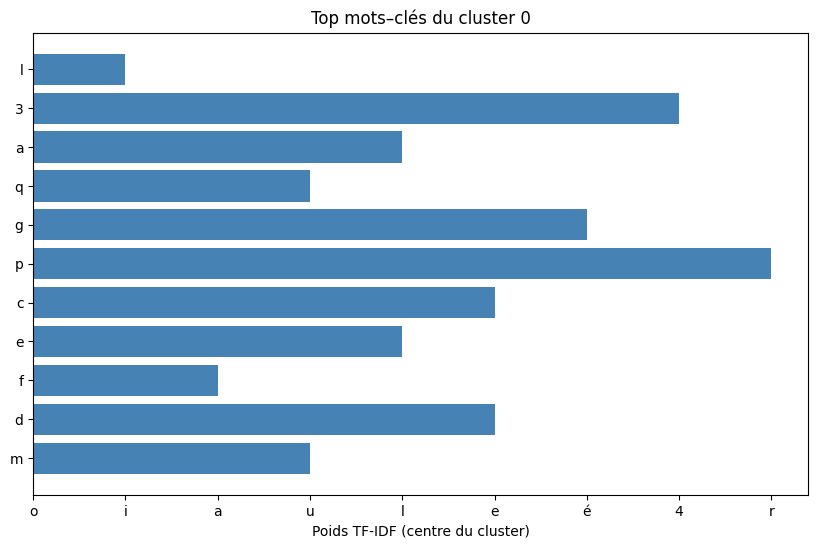

In [19]:
import matplotlib.pyplot as plt

def plot_cluster_keywords(cluster_keywords, cluster_id):
    words, scores = zip(*cluster_keywords[cluster_id])
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], scores[::-1], color="steelblue")
    plt.title(f"Top mots–clés du cluster {cluster_id}")
    plt.xlabel("Poids TF-IDF (centre du cluster)")
    plt.show()

# Exemple : cluster 0
plot_cluster_keywords(cluster_keywords, 0)


### Nouage de points 

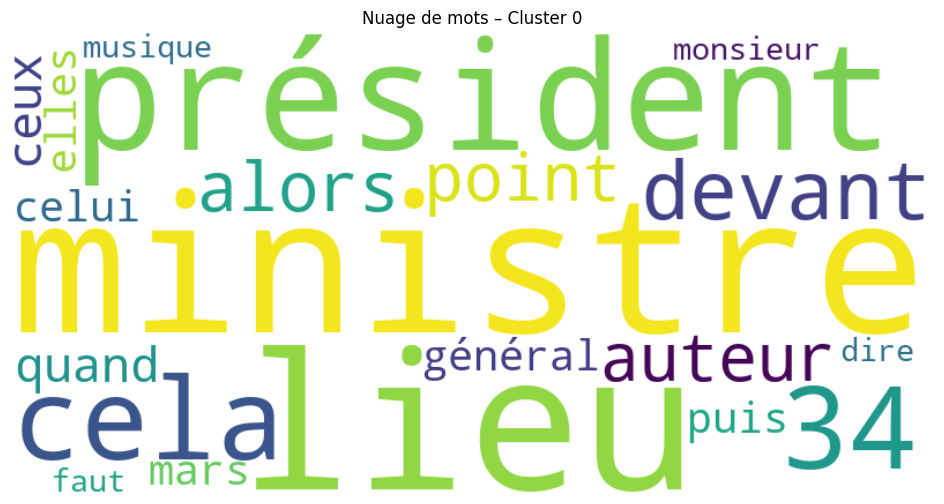

In [25]:
def plot_wordcloud(cluster_keywords, cluster_id):
    # fréquence simple = chaque mot compte pour 1
    freq = {word: 1 for word in cluster_keywords[cluster_id]}

    wc = WordCloud(width=800, height=400, background_color="white")
    wc = wc.generate_from_frequencies(freq)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuage de mots – Cluster {cluster_id}")
    plt.show()

plot_wordcloud(cluster_keywords, 0)


### Résuler les thématiques via topic-embedding PCA

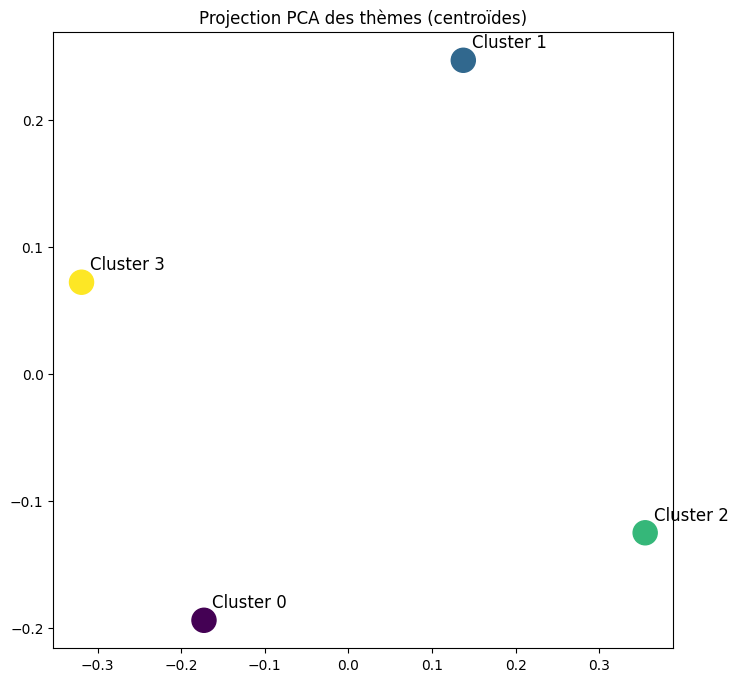

In [26]:
# Cette carte montre la position thématique globale de chaque cluster
ca = PCA(n_components=2)
cluster_points = pca.fit_transform(km_model.cluster_centers_)

plt.figure(figsize=(8,8))
plt.scatter(cluster_points[:,0], cluster_points[:,1], s=300, c=range(N_CLUSTERS))

for i, (x,y) in enumerate(cluster_points):
    plt.text(x+0.01, y+0.01, f"Cluster {i}", fontsize=12)

plt.title("Projection PCA des thèmes (centroïdes)")
plt.show()


### Explorer les mots les plus discriminants entre clusters

In [30]:
# gébérer des mots-clés avec scores
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)


# extraction des mots clés avec scores

centers = km_model.cluster_centers_
terms = vectorizer.get_feature_names_out()

cluster_keywords = {}
N_TOP = 20

for i in range(N_CLUSTERS):
    idx = centers[i].argsort()[-N_TOP:][::-1]
    # Chaque cluster devient une liste de tuples (mot, score)
    cluster_keywords[i] = [(terms[j], centers[i][j]) for j in idx]

print("\nMots-clés par cluster (avec scores) :")
pprint(cluster_keywords)



Mots-clés par cluster (avec scores) :
{0: [('ministre', np.float64(0.01916443214285542)),
     ('lieu', np.float64(0.017074952653405626)),
     ('président', np.float64(0.01685764343819408)),
     ('cela', np.float64(0.016434652051622124)),
     ('34', np.float64(0.015449688547569623)),
     ('devant', np.float64(0.015349476507801876)),
     ('alors', np.float64(0.01502294818319992)),
     ('point', np.float64(0.014833535707129546)),
     ('auteur', np.float64(0.01470623472907104)),
     ('quand', np.float64(0.014612525165305767)),
     ('ceux', np.float64(0.014001804931800246)),
     ('général', np.float64(0.013899169628975975)),
     ('puis', np.float64(0.013757040148301605)),
     ('celui', np.float64(0.013714739224720067)),
     ('elles', np.float64(0.013633842721444385)),
     ('mars', np.float64(0.01361645636516881)),
     ('musique', np.float64(0.013083799143921654)),
     ('faut', np.float64(0.012885332335266468)),
     ('dire', np.float64(0.012831321796678284)),
     ('monsie

In [31]:
# fonction discriminante
disc_words = discriminant_words(cluster_keywords)
pprint(disc_words)


{0: [('ministre', np.float64(0.01916443214285542)),
     ('lieu', np.float64(0.017074952653405626)),
     ('président', np.float64(0.01685764343819408)),
     ('cela', np.float64(0.016434652051622124)),
     ('34', np.float64(0.015449688547569623)),
     ('devant', np.float64(0.015349476507801876)),
     ('alors', np.float64(0.01502294818319992)),
     ('point', np.float64(0.014833535707129546)),
     ('auteur', np.float64(0.01470623472907104)),
     ('quand', np.float64(0.014612525165305767)),
     ('ceux', np.float64(0.014001804931800246)),
     ('général', np.float64(0.013899169628975975)),
     ('puis', np.float64(0.013757040148301605)),
     ('celui', np.float64(0.013714739224720067)),
     ('elles', np.float64(0.013633842721444385))],
 1: [('ena', np.float64(0.20063083918292351)),
     ('ea', np.float64(0.20059014175285617)),
     ('pf', np.float64(0.150142224102618)),
     ('enf', np.float64(0.06742789807258891)),
     ('theatre', np.float64(0.05393640312457248)),
     ('admis',

In [32]:
# verification
cluster_keywords[0][:5]


[('ministre', np.float64(0.01916443214285542)),
 ('lieu', np.float64(0.017074952653405626)),
 ('président', np.float64(0.01685764343819408)),
 ('cela', np.float64(0.016434652051622124)),
 ('34', np.float64(0.015449688547569623))]

In [34]:
# Par exemple : quels mots distinguent vraiment un cluster des autres ?
import numpy as np

def discriminant_words(cluster_keywords):
    all_words = set(word for cluster in cluster_keywords.values() for word, _ in cluster)
    discriminant = {}
    
    for i in range(N_CLUSTERS):
        weights_i = {w: s for w, s in cluster_keywords[i]}
        discriminant[i] = []
        
        for word in all_words:
            score_i = weights_i.get(word, 0)
            score_others = np.mean([
                {w: s for w, s in cluster_keywords[j]}.get(word, 0)
                for j in range(N_CLUSTERS) if j != i
            ])
            discriminant[i].append((word, score_i - score_others))
        
        discriminant[i] = sorted(discriminant[i], key=lambda x: x[1], reverse=True)[:15]
    
    return discriminant

disc_words = discriminant_words(cluster_keywords)
pprint(disc_words)


{0: [('ministre', np.float64(0.01916443214285542)),
     ('lieu', np.float64(0.017074952653405626)),
     ('président', np.float64(0.01685764343819408)),
     ('cela', np.float64(0.016434652051622124)),
     ('34', np.float64(0.015449688547569623)),
     ('devant', np.float64(0.015349476507801876)),
     ('alors', np.float64(0.01502294818319992)),
     ('point', np.float64(0.014833535707129546)),
     ('auteur', np.float64(0.01470623472907104)),
     ('quand', np.float64(0.014612525165305767)),
     ('ceux', np.float64(0.014001804931800246)),
     ('général', np.float64(0.013899169628975975)),
     ('puis', np.float64(0.013757040148301605)),
     ('celui', np.float64(0.013714739224720067)),
     ('elles', np.float64(0.013633842721444385))],
 1: [('ena', np.float64(0.20063083918292351)),
     ('ea', np.float64(0.20059014175285617)),
     ('pf', np.float64(0.150142224102618)),
     ('enf', np.float64(0.06742789807258891)),
     ('theatre', np.float64(0.05393640312457248)),
     ('admis',

### Obtenir les articles les plus représentatifs de chaque cluster

In [35]:
tfidf_array = tfidf_vectors.toarray()

repr_docs = {}

for c in range(N_CLUSTERS):
    distances = cosine_distances(tfidf_array, centers[c].reshape(1, -1)).reshape(-1)
    closest = distances.argsort()[:5]
    repr_docs[c] = [filtered_files[i] for i in closest]

pprint(repr_docs)


{0: ['KB_JB838_1960-06-17_01-00002.txt',
     'KB_JB838_1953-01-08_01-00002.txt',
     'KB_JB838_1956-11-29_01-00002.txt',
     'KB_JB838_1954-03-11_01-00002.txt',
     'KB_JB838_1956-03-29_01-00002.txt'],
 1: ['KB_JB838_1957-06-28_01-00014.txt',
     'KB_JB838_1954-06-18_01-00010.txt',
     'KB_JB838_1954-04-23_01-00010.txt',
     'KB_JB838_1954-07-23_01-00010.txt',
     'KB_JB838_1956-12-14_01-00012.txt'],
 2: ['KB_JB838_1954-06-22_01-00009.txt',
     'KB_JB838_1955-03-22_01-00010.txt',
     'KB_JB838_1957-02-26_01-00010.txt',
     'KB_JB838_1954-04-28_01-00009.txt',
     'KB_JB838_1957-05-14_01-00010.txt'],
 3: ['KB_JB838_1966-08-13_01-00011.txt',
     'KB_JB838_1966-10-01_01-00012.txt',
     'KB_JB838_1966-04-23_01-00013.txt',
     'KB_JB838_1966-09-17_01-00011.txt',
     'KB_JB838_1966-09-03_01-00011.txt']}


### Visualisation en 2D (PCA)

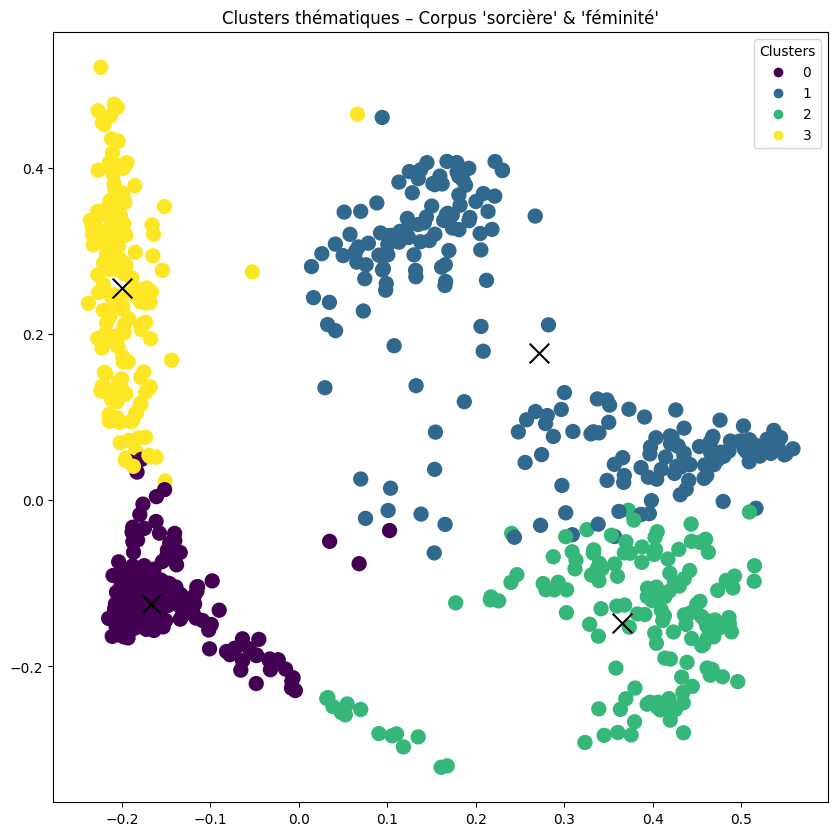

In [36]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_array)

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# centroides
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=200, color="black")

plt.title("Clusters thématiques – Corpus 'sorcière' & 'féminité'")
plt.legend(handles=scatter.legend_elements()[0],
           labels=set(clusters),
           title="Clusters")
plt.show()
